In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [4]:
data=pd.read_csv("Admission_Predict.csv",index_col='Serial No.')

In [5]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [8]:
y=data['Chance of Admit ']
X=data.drop('Chance of Admit ',axis=1)

In [9]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [10]:
pca=PCA(n_components=2)
pca.fit(X)
X_PCA=pca.transform(X)

In [12]:
X_PCA=pd.DataFrame(X_PCA,columns=['PCA1','PCA2'])

In [13]:
X_PCA

,PCA1,PCA2
0,-22.874437,0.842160
1,-6.437340,-3.351222
2,2.221243,-2.744568
3,-5.744984,0.000912
4,4.594122,-2.912718
...,...,...
395,-7.597382,-0.819780
396,-7.190055,-3.967099
397,-15.749376,2.146158
398,6.186817,-1.799805


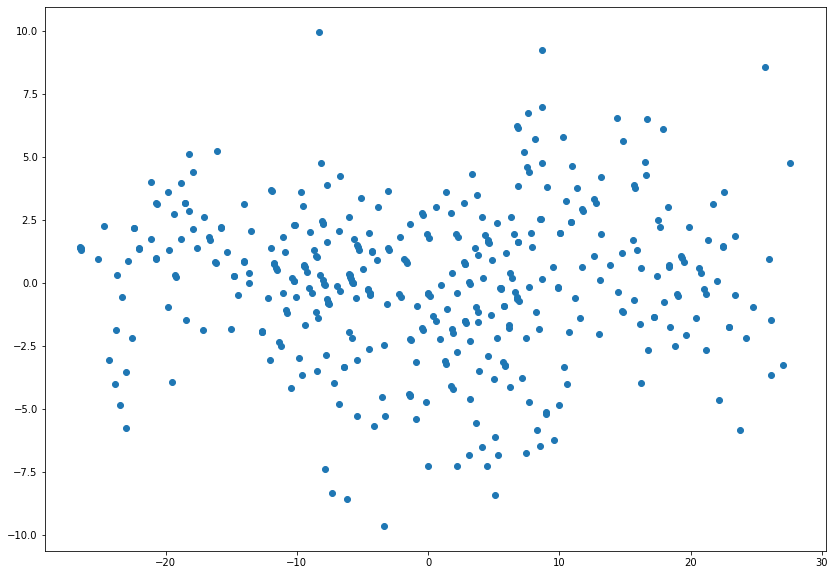

In [14]:
plt.figure(figsize=(14,10))
plt.scatter(X_PCA['PCA1'],X_PCA['PCA2'])

In [16]:
PCA_max=np.argmax(X_PCA['PCA1'])
PCA_min=np.argmin(X_PCA['PCA1'])


C:\Users\dixit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
C:\Users\dixit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


In [18]:
PCA_max,PCA_min

(377, 202)

In [19]:
X.iloc[PCA_max,:]

GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 378, dtype: float64

In [21]:
X.iloc[PCA_min,:]

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Name: 203, dtype: float64

In [22]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [23]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=80,shuffle=True)

In [26]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.score(X_test,y_test)

0.7965455295757976

In [28]:
pred=model.predict(X_test)

In [29]:
pred

array([0.66886813, 0.61606992, 0.52302122, 0.5679184 , 0.88316482,
       0.63772329, 0.49534438, 0.52366336, 0.7332495 , 0.68913742,
       0.95495394, 0.75329902, 0.63696952, 0.84027608, 0.80673494,
       0.85212514, 0.6379519 , 0.69705159, 0.63881129, 0.55147328,
       0.9570219 , 0.62529085, 0.60544645, 0.53988252, 0.84767403,
       0.79547625, 0.65343408, 0.78103615, 0.95068707, 0.71945921,
       0.74576902, 0.69301132, 0.68578103, 0.66693672, 0.46654342,
       0.96624329, 0.73327886, 0.72378634, 0.8891241 , 0.79029337,
       0.76362306, 0.86313671, 0.63788746, 0.92725363, 0.81200057,
       0.92879542, 0.53450982, 0.95318281, 0.812122  , 0.8706213 ,
       0.6731244 , 0.77309704, 0.66579493, 0.73753172, 0.78020811,
       0.67668826, 0.58964031, 0.98118334, 0.64543524, 0.68235423,
       0.73796749, 0.67691688, 0.83757345, 0.44726218, 0.69265109,
       0.69095132, 0.6063056 , 0.65939441, 0.52588707, 0.79807375,
       0.96932962, 0.85724207, 0.72353428, 0.70532619, 0.72483

Text(0, 0.5, 'Actual')

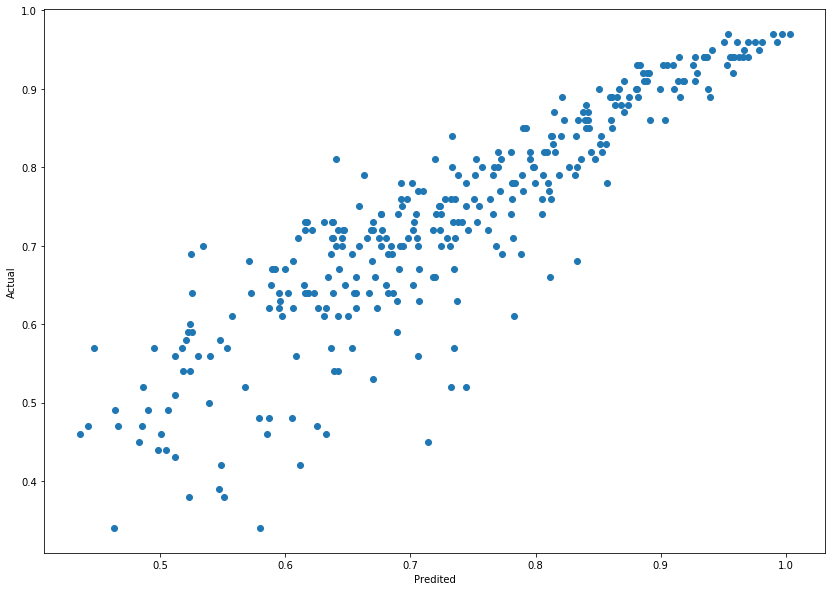

In [30]:
plt.figure(figsize=(14,10))
plt.plot(pred,y_test,'o')
plt.xlabel('Predited')
plt.ylabel('Actual')